<a href="https://colab.research.google.com/github/b1sruthi/Sruthi_Data606/blob/main/docs/src/final_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#from mixed_naive_bayes import MixedNB
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import mlxtend

In [2]:
credit_df = pd.read_csv('/content/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Understanding Data

In [3]:
# performing eda
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#checking for null values
credit_df.isnull().sum().max()

0

In [5]:
#checking the number of columns
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#checking the number of fraud and non-fraud classes
print('No Frauds', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100,2), '% of the dataset')
print('Frauds', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
#checking the data type 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

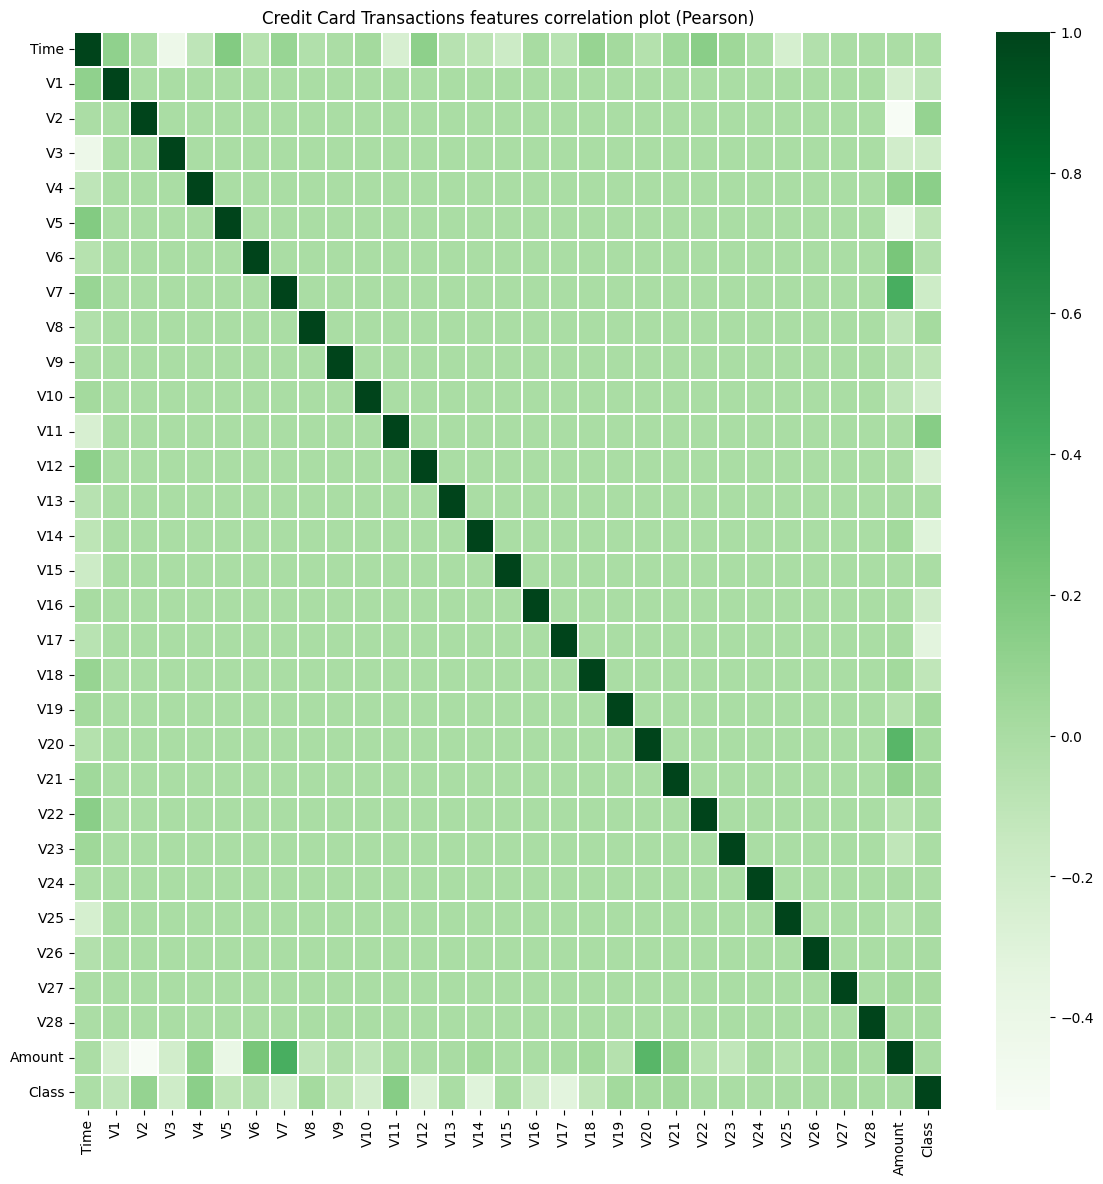

In [8]:
# checking the co-relation between all the features.
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = credit_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

##### Since, there are no null values and the data seems fine we do not need to use the normalization techniques to perform data cleaning.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

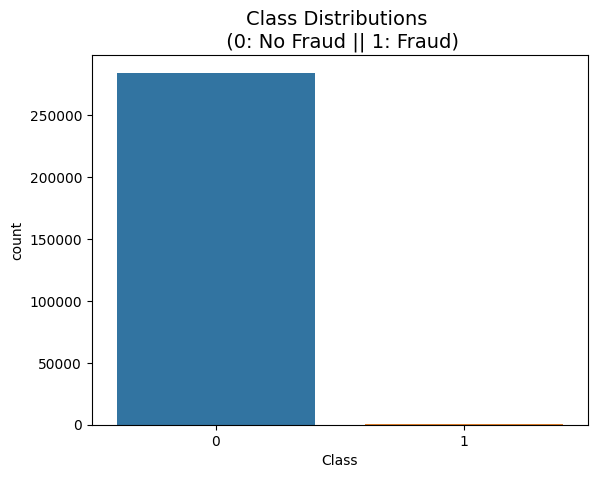

In [9]:
#graph represents the number of fraud and non-fraud casses 
sns.countplot(x='Class', data=credit_df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [10]:
#checking for null values in each column
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_df = credit_df.dropna()

<ipython-input-12-e3fca166cee6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-12-e3fca166cee6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


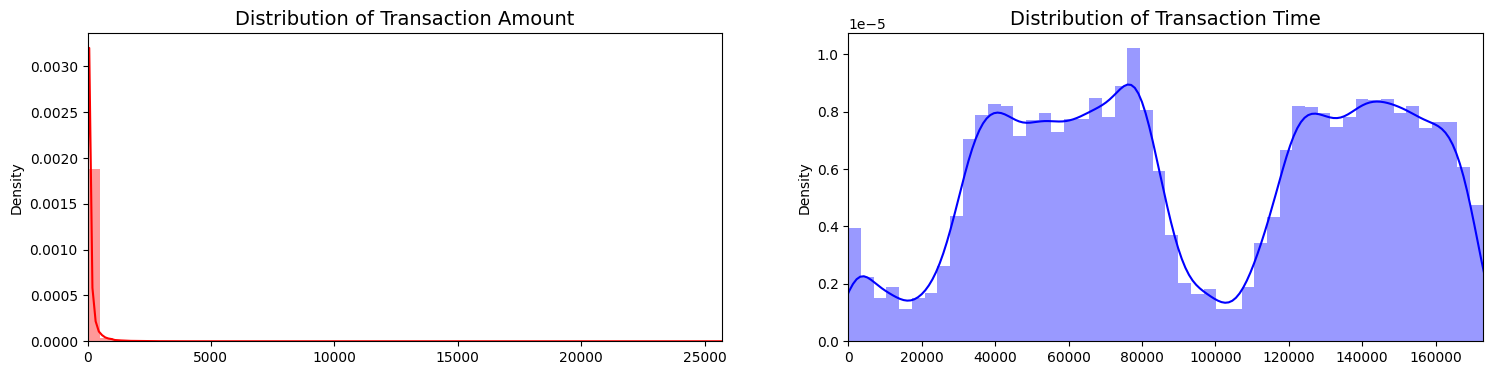

In [12]:
#checking the skewed data distributions
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_df['Amount'].values
time_val = credit_df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Scaling the time and amount columns
- as the data in these columns is skewed unlike the rest of the columns

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

credit_df['scaled_amount'] = rob_scaler.fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['scaled_time'] = rob_scaler.fit_transform(credit_df['Time'].values.reshape(-1,1))

credit_df.drop(['Time','Amount'], axis=1, inplace=True)

### Splitting the data 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('No Frauds', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100,2), '% of the dataset')
print('Frauds', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100,2), '% of the dataset')

X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Implementing Random under sampling to make the data balanced 

In [15]:
#random unedr sampling
credit_df = credit_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = credit_df.loc[credit_df['Class'] == 1]
non_fraud_df = credit_df.loc[credit_df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
77796,-1.338266,-0.678338,1.292810,-1.552036,1.622048,4.338204,-0.697904,1.370951,1.001094,-1.084292,...,-0.179202,-0.003627,1.082784,0.521667,1.057789,0.207434,0.130735,0,1.391462,-0.322854
27627,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,...,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1,-0.042479,-0.588094
227270,-0.034546,-0.933279,1.149132,-3.181328,-0.748010,-0.768164,0.129352,-0.338305,-1.516846,0.641580,...,-0.275715,0.422138,-0.118783,-1.335940,-0.876574,0.067534,0.034532,0,0.824146,0.708561
189878,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,-2.297734,...,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,1,-0.293440,0.515784
149145,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,0.369936,...,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,1,-0.209739,0.070302


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


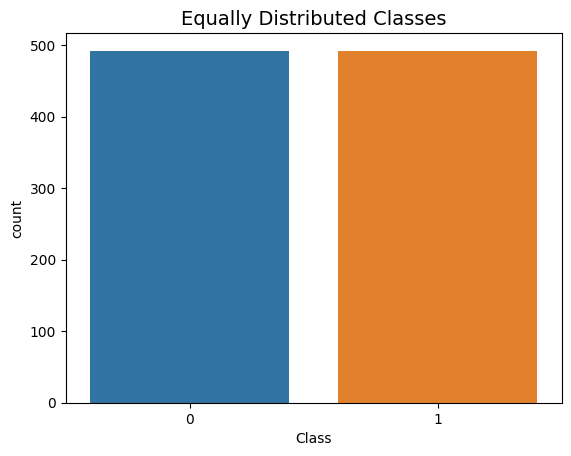

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### checking the correlation matrix

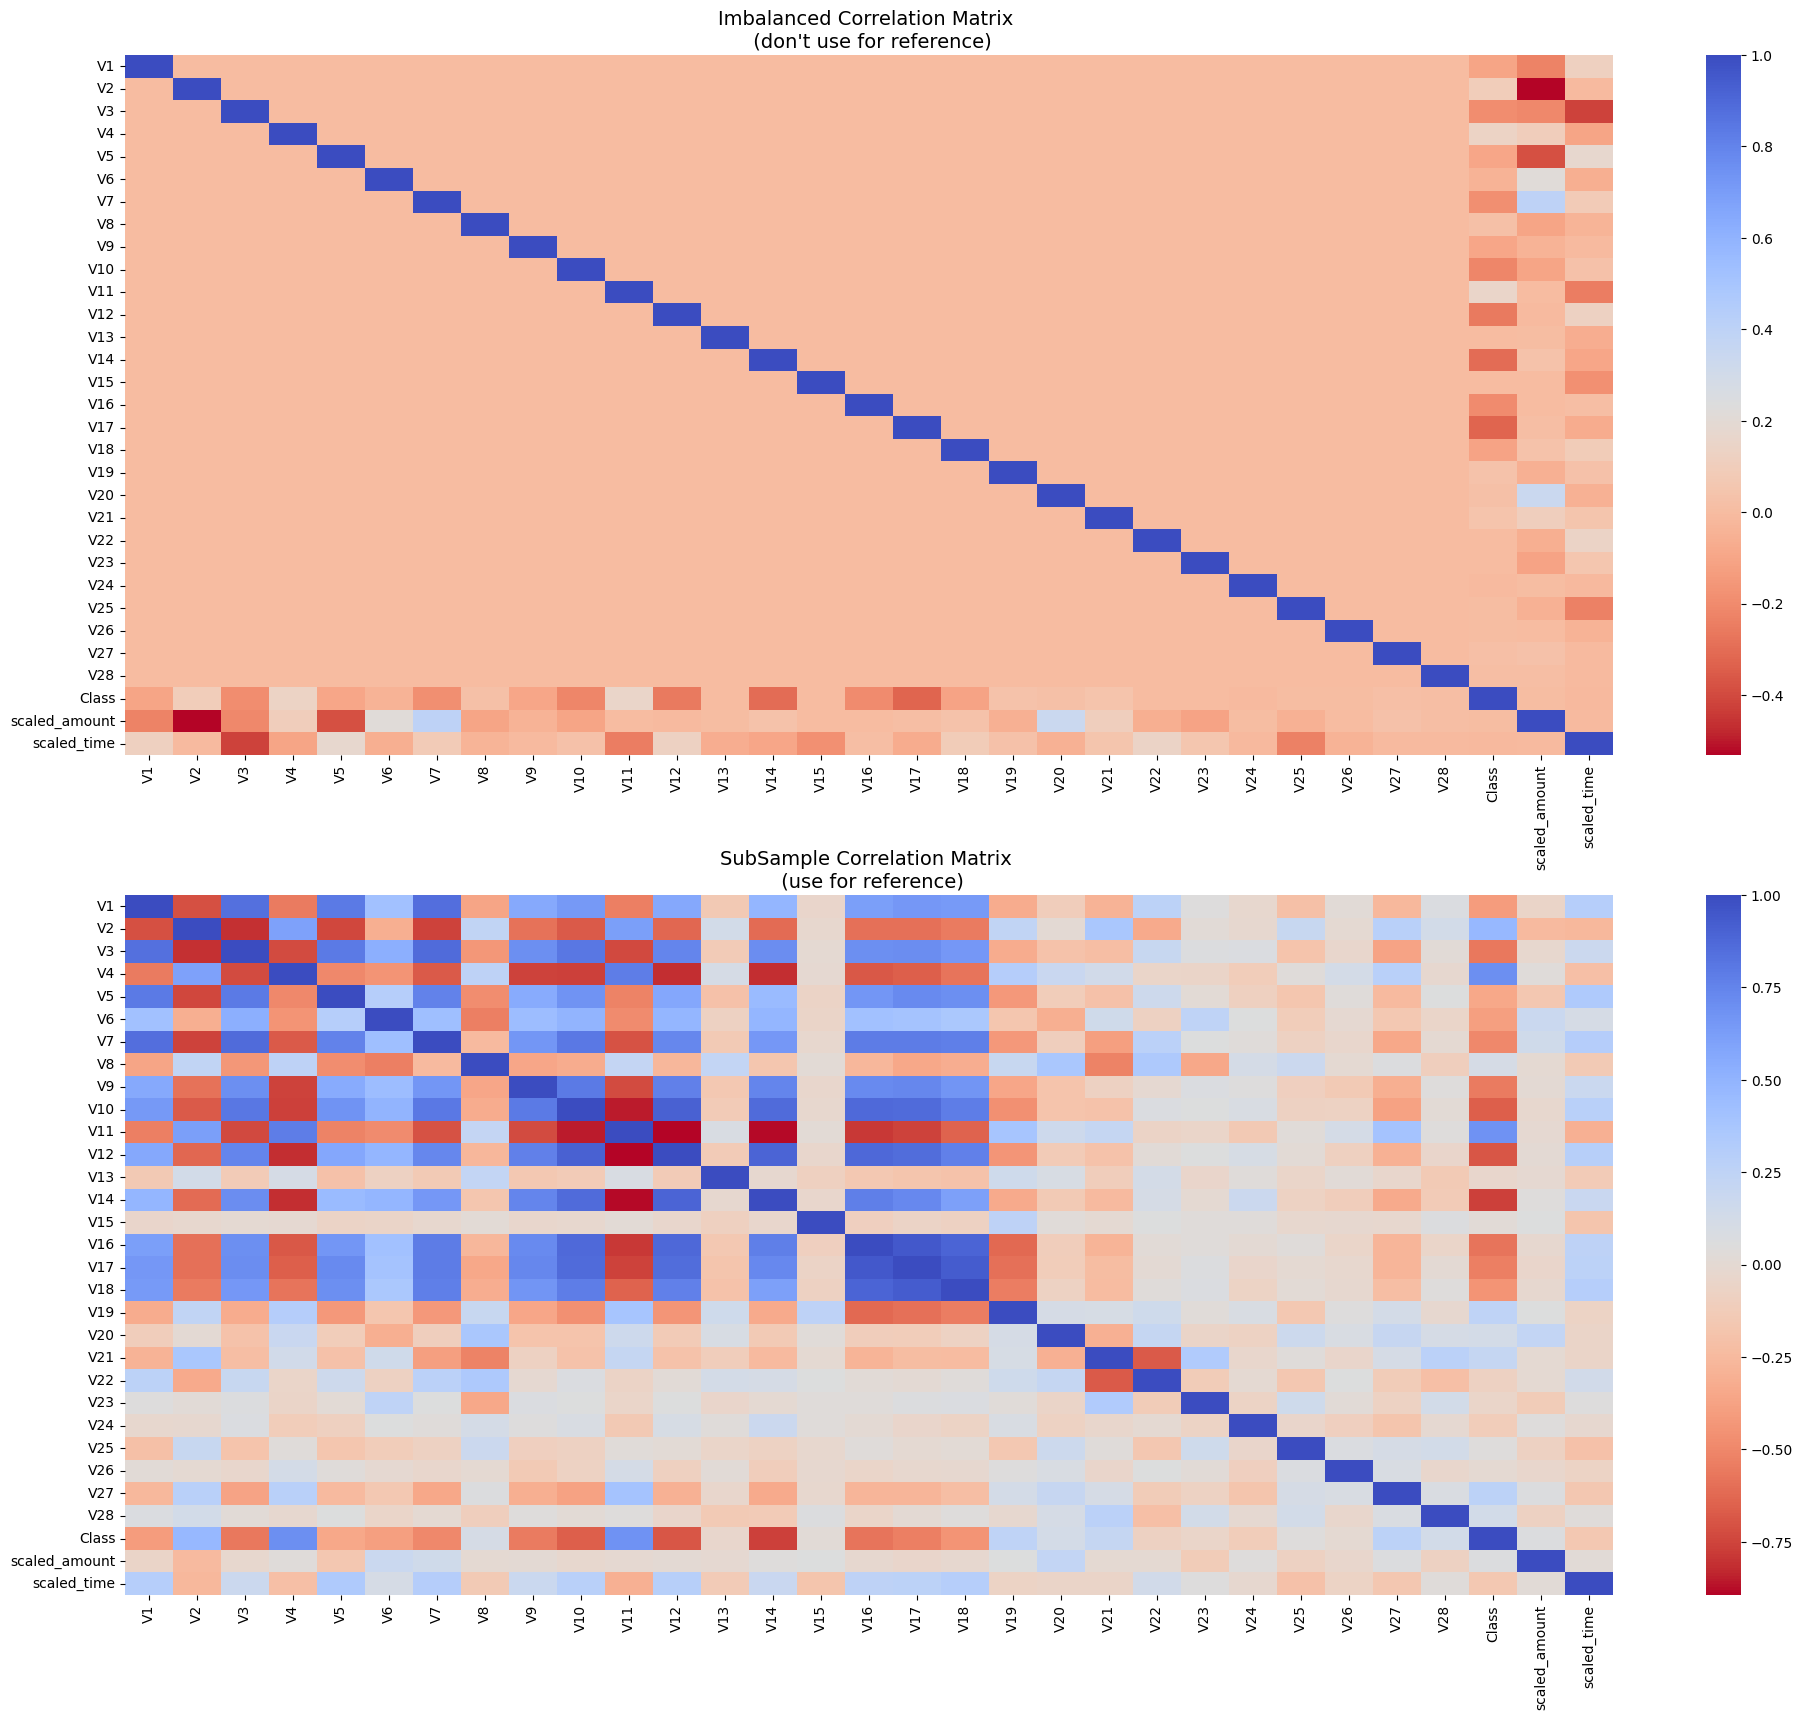

In [77]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = credit_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

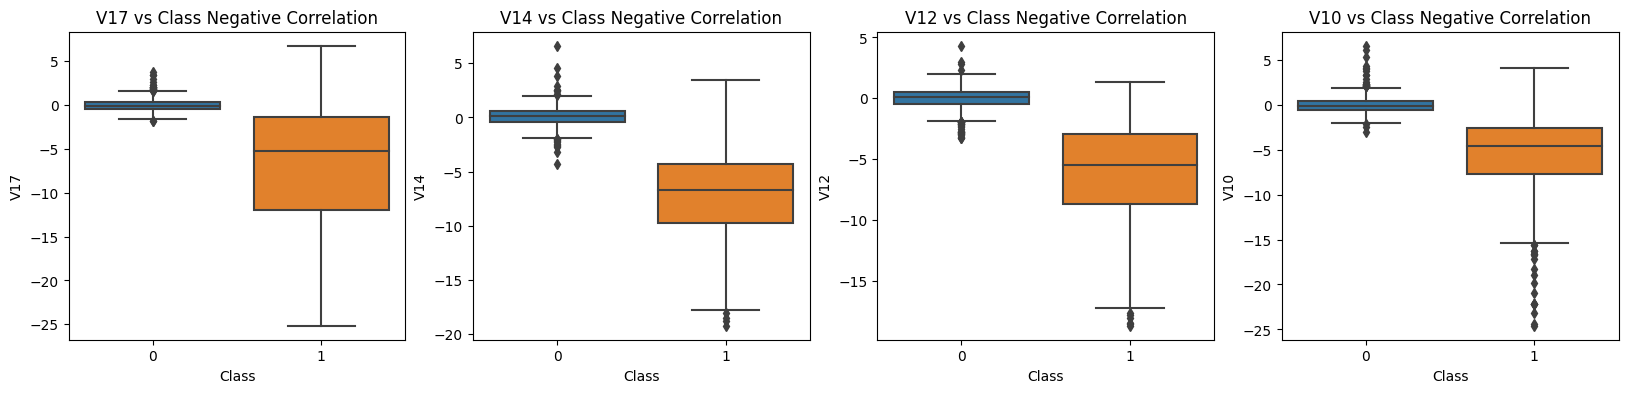

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

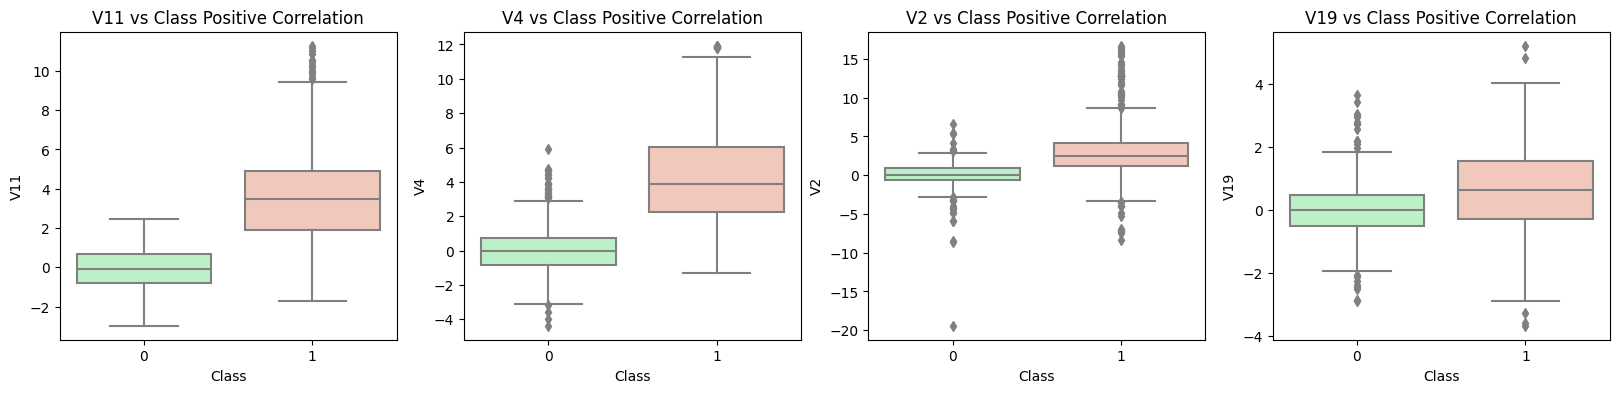

In [74]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### checking for outlier! the culprit!

<ipython-input-18-59787bdd53f6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
<ipython-input-18-59787bdd53f6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-18-59787bdd53f6>:1

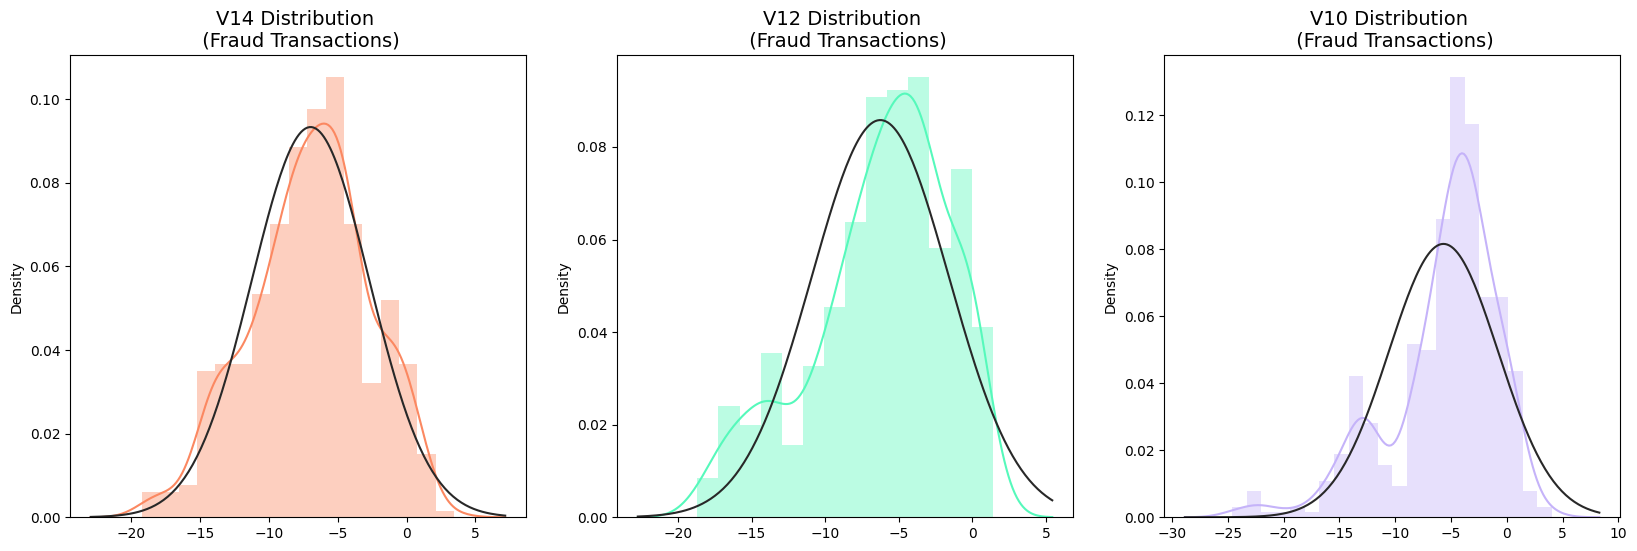

In [18]:
#Anomaly detection
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [19]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -18.0499976898594, -19.2143254902614, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.0475965708216, -18.6837146333443, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 973
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-18.9132433348732, -15.123752

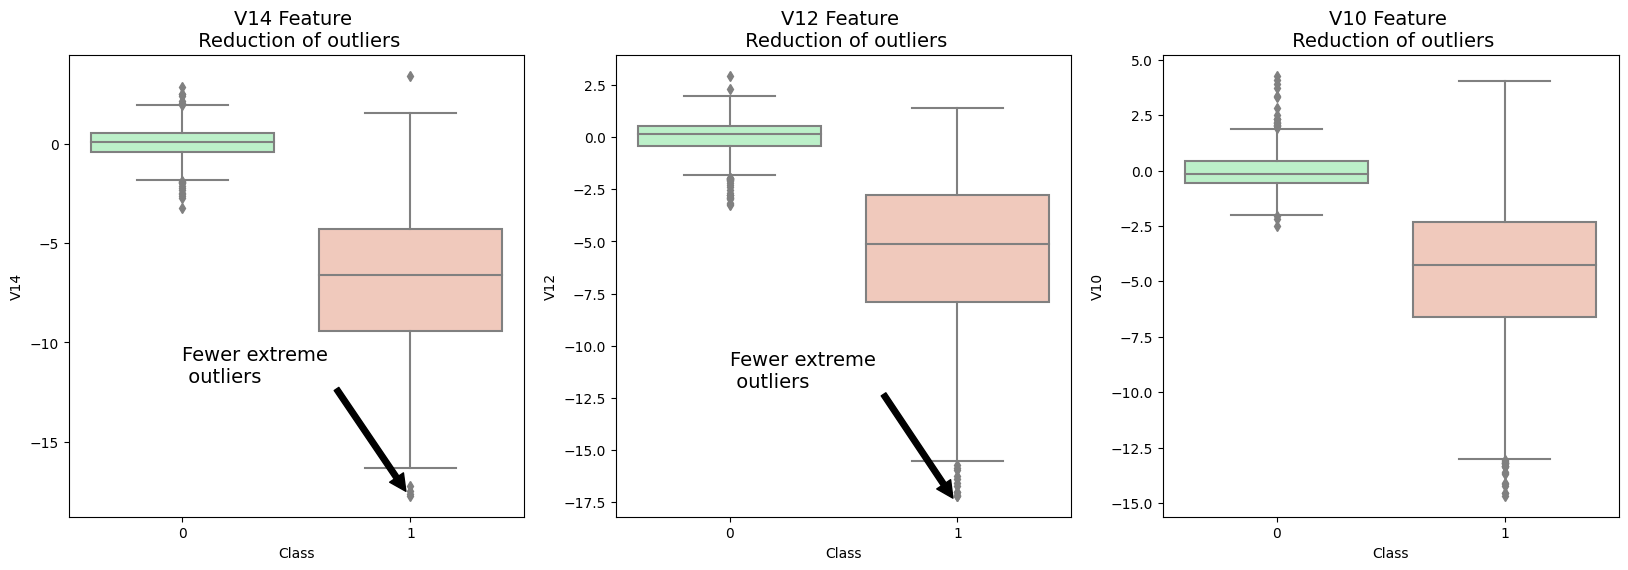

In [20]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [21]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 8.4 s
PCA took 0.02 s
Truncated SVD took 0.01 s


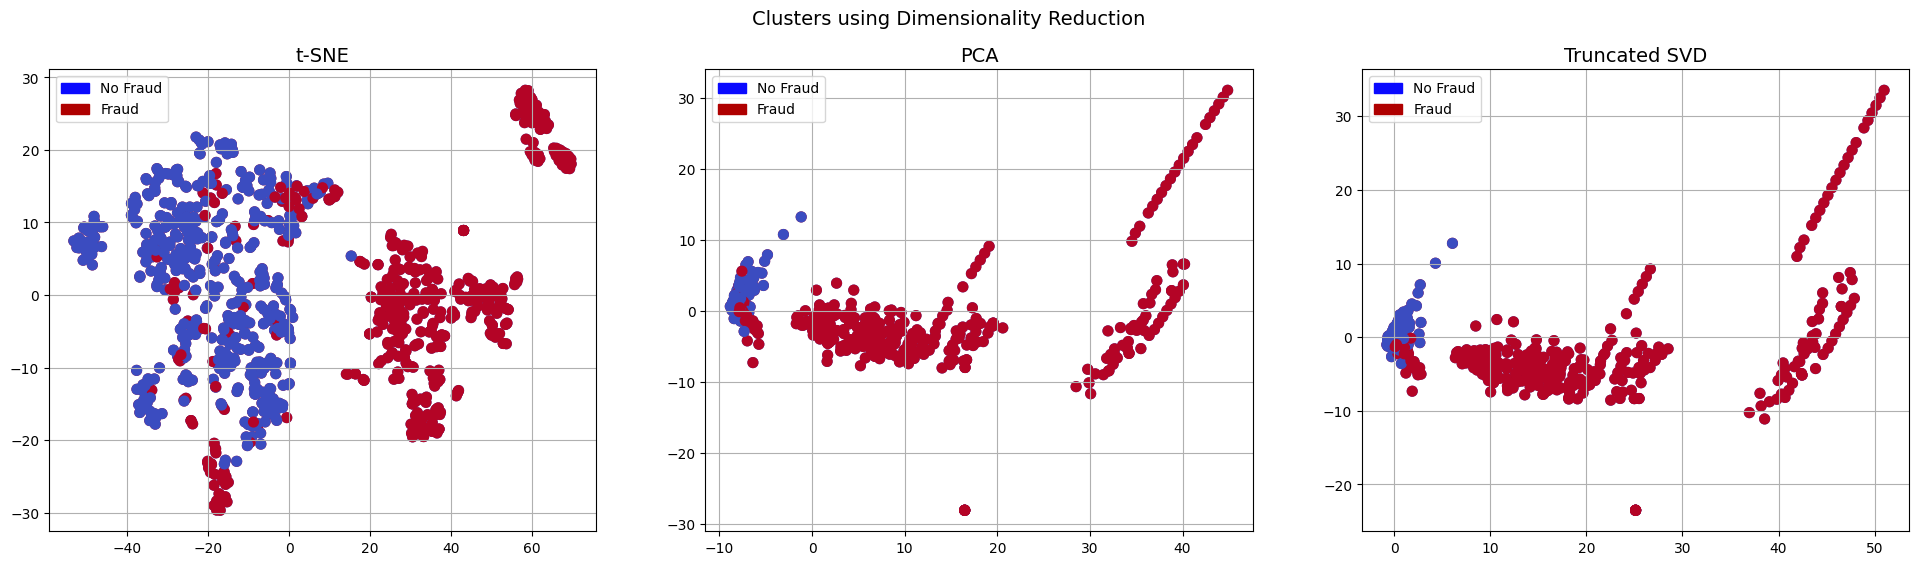

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### Implementing the Machine Learning Algorithms

In [78]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df_ = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [81]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [83]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data
\
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       363
           1       1.00      1.00      1.00       366

    accuracy                           1.00       729
   macro avg       1.00      1.00      1.00       729
weighted avg       1.00      1.00      1.00       729
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.99      0.93       123
           1       0.99      0.87      0.92       120

    accuracy                           0.93       243
   macro avg       0.94      0.93      0.93       243
weighted avg       0.94      0.93      0.93       243



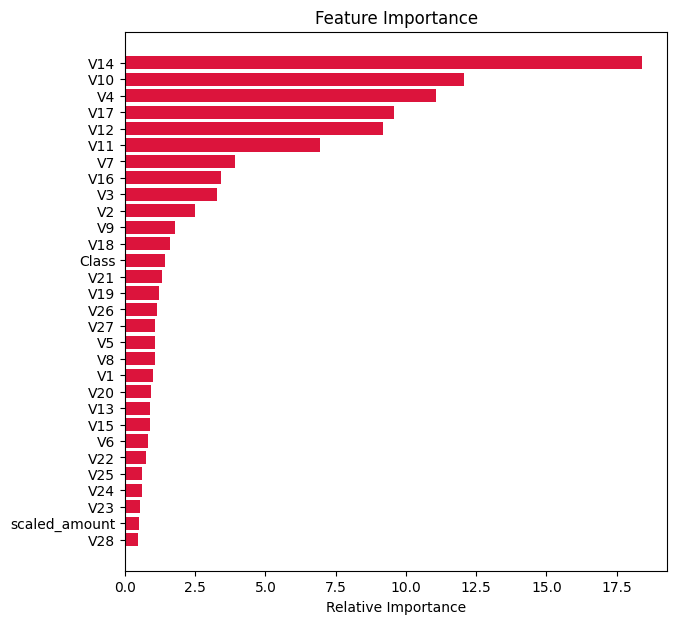

In [84]:
# Calculating the feature importance

feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart 

sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, credit_df.columns[0:-1][sorted_idx])
plt.show()

In [85]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  
#performing linear regression.
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

LinearRegression()

In [86]:
 # Calculating R^2 score for train
r2_train_score = reg.score(X_train, y_train)  

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.6479 

Coefficients of Linear Model: [-0.02369782 -0.02265825 -0.01971525  0.06026573 -0.0090282  -0.00843144
  0.05814559 -0.01478016  0.02452358 -0.03272567  0.00480552  0.01489644
 -0.01620294 -0.05892891 -0.00403094 -0.01131276  0.00153842  0.01300135
  0.0081089   0.01392201  0.03120727  0.03241793 -0.04955139  0.01342948
 -0.00810833 -0.10305286 -0.01404474  0.0663796  -0.01155784 -0.03093823] 

Intercept: 0.1904411366790621


In [87]:
# calculating the predictions

y_pred = reg.predict(X_test)
y_pred[:20]  # show predictions of first 20 data points in test dataset

array([ 0.18519491,  0.14726221,  1.4175765 ,  0.15475567,  1.05271132,
        0.49224991,  0.69581155,  0.17572287,  0.67124306,  1.29926396,
        0.65819587, -0.01331641,  0.16591758,  0.26875727,  0.11559254,
        0.1831258 ,  0.90786014,  0.29133915, -0.01398208, -0.02719327])

In [88]:
# calculate performance of the model for test subset and Calculating R^2 score for train
r2_test_score = reg.score(X_test, y_test)  
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.6087 



In [105]:
from sklearn import tree 

tr_reg = tree.DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [106]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [107]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.572 



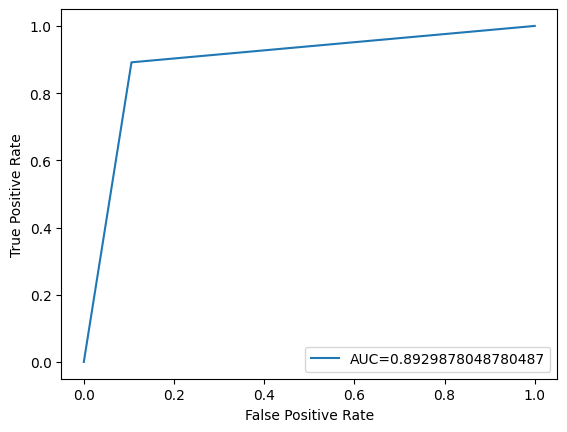

In [108]:
fpr, tpr, _ = metrics.roc_curve(y_test,  test_y_pred)
auc = metrics.roc_auc_score(y_test, test_y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [109]:
# Importing BaggingRegressor from ensemble module

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(), n_estimators=100, random_state=3)
bag_reg.fit(X_train, y_train)  # Fitting the train data

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=3)

In [110]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

In [111]:
r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9704 

R^2 score for test dataset =  0.7884 



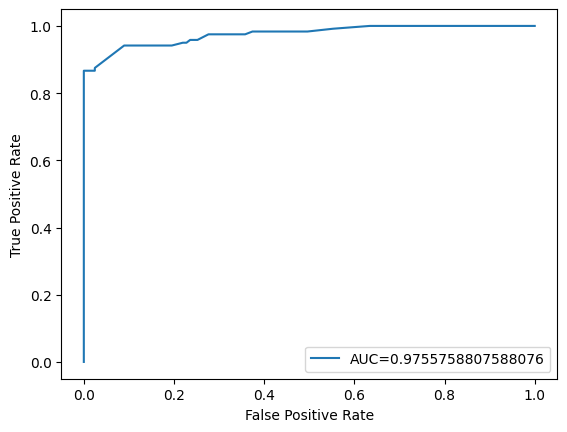

In [112]:
fpr, tpr, _ = metrics.roc_curve(y_test,  test_y_pred)
auc = metrics.roc_auc_score(y_test, test_y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [113]:
from sklearn.linear_model import LogisticRegression   

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) 

logreg.fit(X_train, y_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=10000, penalty='none')

In [114]:
# Predict probabilities for first 10 instances in train and test subsets :

y_train_pred_prob = logreg.predict_proba(X_train)  
y_test_pred_prob = logreg.predict_proba(X_test)    
print('Train predictions for probabilities:\n\n', y_train_pred_prob[:10],'\n')
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:10])

Train predictions for probabilities:

 [[4.94381650e-01 5.05618350e-01]
 [1.00000000e+00 4.84830491e-37]
 [9.99577309e-01 4.22690701e-04]
 [9.89658076e-01 1.03419236e-02]
 [0.00000000e+00 1.00000000e+00]
 [8.05956725e-01 1.94043275e-01]
 [4.79601464e-03 9.95203985e-01]
 [9.90192494e-01 9.80750556e-03]
 [7.64418729e-04 9.99235581e-01]
 [8.92058977e-01 1.07941023e-01]] 

Test predictions for probabilities:

 [[9.99007072e-001 9.92927598e-004]
 [9.95640581e-001 4.35941911e-003]
 [0.00000000e+000 1.00000000e+000]
 [9.91913675e-001 8.08632470e-003]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 6.74266077e-120]
 [0.00000000e+000 1.00000000e+000]
 [9.77790766e-001 2.22092339e-002]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]]


In [115]:
y_train_pred = y_train_pred_prob.argmax(axis=1)  
y_test_pred = y_test_pred_prob.argmax(axis=1)  
print('Predicted class for train: ', y_train_pred[:10],'\n')     
print('Predicted class for test: ', y_test_pred[:10])


Predicted class for train:  [1 0 0 0 1 0 1 0 1 0] 

Predicted class for test:  [0 0 1 0 1 0 1 0 1 1]


In [116]:
# Calculating accuracy of model

from sklearn import metrics  

train_score = metrics.accuracy_score(y_train, y_train_pred) 

test_score = metrics.accuracy_score(y_test, y_test_pred)   

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.95748 

Test accuracy score of the model is  0.93416


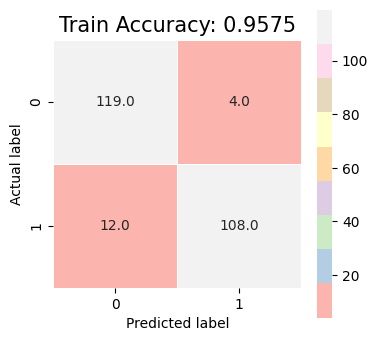

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.91      0.97      0.94       123
           1       0.96      0.90      0.93       120

    accuracy                           0.93       243
   macro avg       0.94      0.93      0.93       243
weighted avg       0.94      0.93      0.93       243



In [117]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

train_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Classification Report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

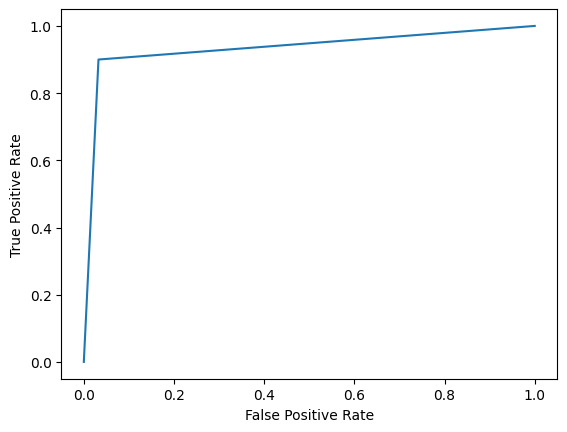

In [118]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

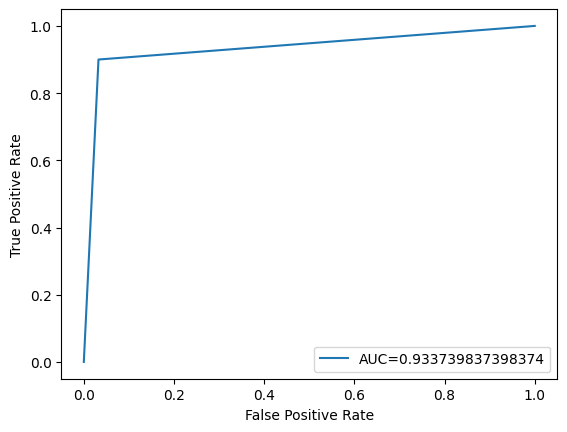

In [101]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [119]:
from sklearn import tree # Importing 'tree' module from sklearn
tr_clf = tree.DecisionTreeClassifier()
tr_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [120]:
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [121]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train␣ , →accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test␣ , →accuracy
train_report = classification_report(y_train, train_y_pred) # Generate␣ , →classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate␣ , →classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       363
           1       1.00      1.00      1.00       366

    accuracy                           1.00       729
   macro avg       1.00      1.00      1.00       729
weighted avg       1.00      1.00      1.00       729
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.88      0.89       123
           1       0.88      0.89      0.88       120

    accuracy                           0.88       243
   macro avg       0.88      0.88      0.88       243
weighted avg       0.88      0.88      0.88       243



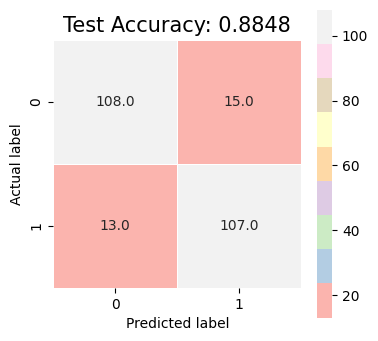

In [122]:
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

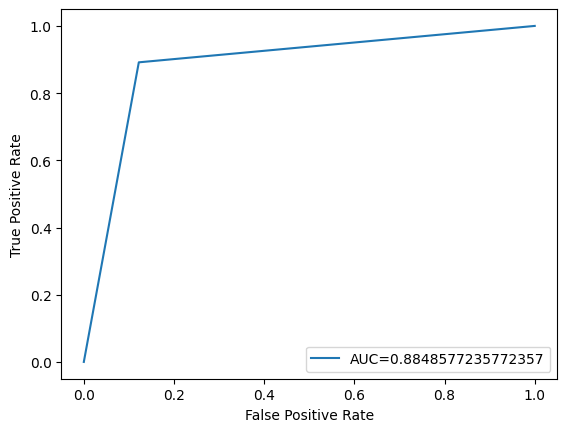

In [123]:
fpr, tpr, _ = metrics.roc_curve(y_test,  test_y_pred)
auc = metrics.roc_auc_score(y_test, test_y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [124]:
# Constructing a bagged-tree classifier

from sklearn.ensemble import BaggingClassifier

#bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=18, random_state=3).95
bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier())
bag_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [125]:
# Finding the predictions of the bagged-tree classifier for train and test subsets

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

In [126]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged Trees Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged Trees Classifier Test Classification Report: \n\n', test_report)

Bagged Trees Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       363
           1       1.00      0.99      0.99       366

    accuracy                           0.99       729
   macro avg       0.99      0.99      0.99       729
weighted avg       0.99      0.99      0.99       729
 


Bagged Trees Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.97      0.93       123
           1       0.96      0.89      0.93       120

    accuracy                           0.93       243
   macro avg       0.93      0.93      0.93       243
weighted avg       0.93      0.93      0.93       243



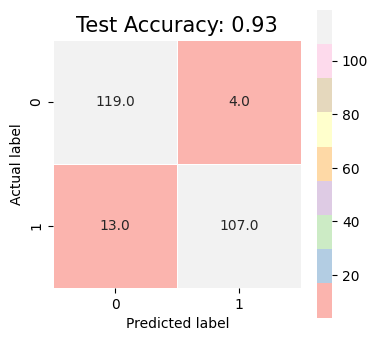

In [128]:
#confusion matrix 
train_c_matrix = confusion_matrix(y_test, test_y_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

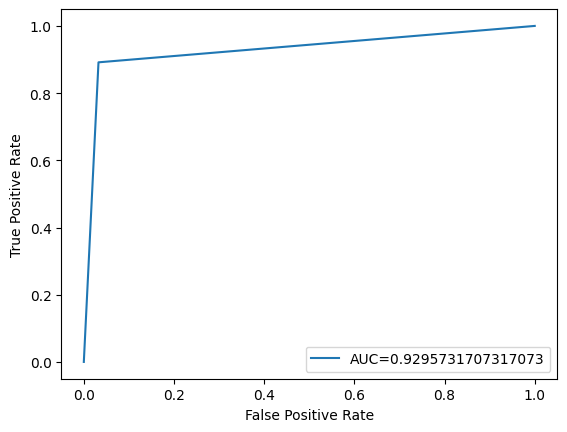

In [129]:
# roc-auc curve 
fpr, tpr, _ = metrics.roc_curve(y_test,  test_y_pred)
auc = metrics.roc_auc_score(y_test, test_y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Neural Networks 

In [127]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [59]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [61]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [62]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [63]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [64]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
25/25 - 1s - loss: 0.5033 - accuracy: 0.7396 - val_loss: 0.3522 - val_accuracy: 0.8675 - 904ms/epoch - 36ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3261 - accuracy: 0.9022 - val_loss: 0.2823 - val_accuracy: 0.9272 - 77ms/epoch - 3ms/step
Epoch 3/20
25/25 - 0s - loss: 0.2549 - accuracy: 0.9337 - val_loss: 0.2388 - val_accuracy: 0.9139 - 73ms/epoch - 3ms/step
Epoch 4/20
25/25 - 0s - loss: 0.2110 - accuracy: 0.9386 - val_loss: 0.2169 - val_accuracy: 0.9272 - 78ms/epoch - 3ms/step
Epoch 5/20
25/25 - 0s - loss: 0.1797 - accuracy: 0.9436 - val_loss: 0.2057 - val_accuracy: 0.9205 - 75ms/epoch - 3ms/step
Epoch 6/20
25/25 - 0s - loss: 0.1594 - accuracy: 0.9469 - val_loss: 0.1991 - val_accuracy: 0.9139 - 90ms/epoch - 4ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1461 - accuracy: 0.9519 - val_loss: 0.1940 - val_accuracy: 0.9139 - 85ms/epoch - 3ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1348 - accuracy: 0.9519 - val_loss: 0.1934 - val_accuracy: 0.9139 - 90ms/epoch - 4ms/step
Epoch 9/20
25/25 - 0s 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = credit_df.drop('Class', axis=1)
y = credit_df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0016803455994382128
Non-Fraudulant transaction weight: 0.9983196544005618


In [67]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [69]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               7936      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [70]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 19s 168ms/step - loss: 0.8168 - fn: 48.0000 - fp: 72503.0000 - tn: 86720.0000 - tp: 220.0000 - precision: 0.0030 - recall: 0.8209 - val_loss: 0.5618 - val_fn: 15.0000 - val_fp: 160.0000 - val_tn: 39637.0000 - val_tp: 61.0000 - val_precision: 0.2760 - val_recall: 0.8026
Epoch 2/300
78/78 [==============================] - 8s 97ms/step - loss: 0.6923 - fn: 37.0000 - fp: 61223.0000 - tn: 98000.0000 - tp: 231.0000 - precision: 0.0038 - recall: 0.8619 - val_loss: 0.5069 - val_fn: 15.0000 - val_fp: 130.0000 - val_tn: 39667.0000 - val_tp: 61.0000 - val_precision: 0.3194 - val_recall: 0.8026
Epoch 3/300
78/78 [==============================] - 6s 79ms/step - loss: 0.6117 - fn: 45.0000 - fp: 48452.0000 - tn: 110771.0000 - tp: 223.0000 - precision: 0.0046 - recall: 0.8321 - val_loss: 0.4649 - val_fn: 15.0000 - val_fp: 52.0000 - val_tn: 39745.0000 - val_tp: 61.0000 - val_precision: 0.5398 - val_recall: 0.8026
Epoch 4/300
78/78 [================

In [71]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 20s 7ms/step - loss: 0.0048 - fn: 33.0000 - fp: 6.0000 - tn: 85289.0000 - tp: 115.0000 - precision: 0.9504 - recall: 0.7770
[0.004780329763889313, 33.0, 6.0, 85289.0, 115.0, 0.9504132270812988, 0.7770270109176636]


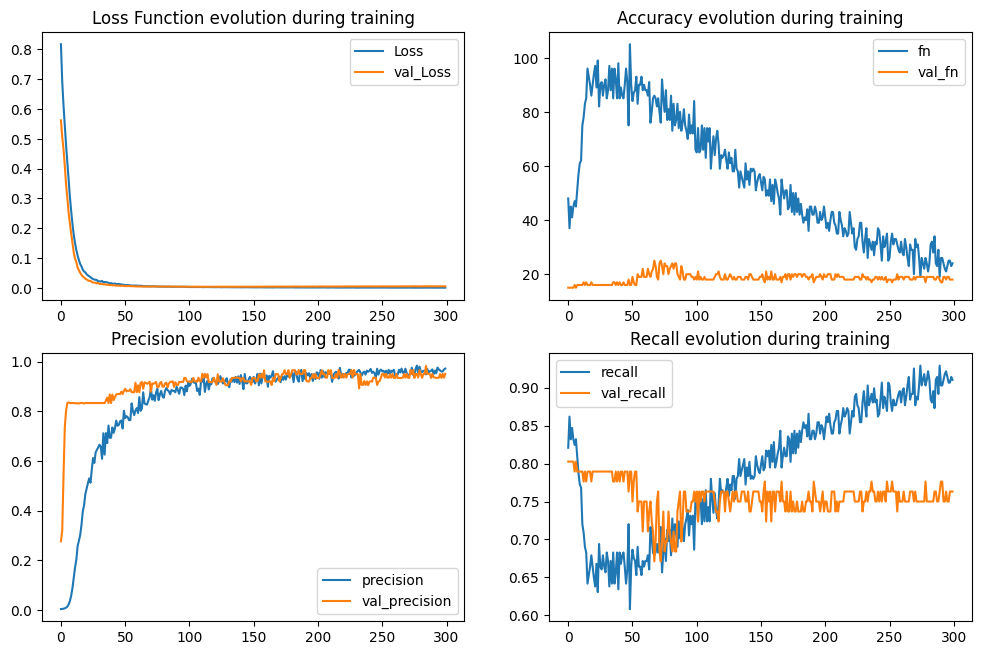

In [72]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [73]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 9s 3ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999887    1.000000  0.999887       0.999943       0.999887
recall          1.000000    0.932836  0.999887       0.966418       0.999887
f1-score        0.999943    0.965251  0.999887       0.982597       0.999885
support    159223.000000  268.000000  0.999887  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159223      0]
 [    18    250]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999613    0.950413  0.999544      0.975013      0.999528
recall         0.999930    0.777027  0.999544      0.888478      0.999544
f1-score       0.